In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.tests import test_influence
from statsmodels.graphics.regressionplots import influence_plot

In [3]:
path=r"50_Startups.csv"
df1=pd.read_csv(path)
df1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
df1.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [5]:
df1=df1.rename({'R&D Spend':'RD_Spend','Marketing Spend':'Marketing_Spend'},axis=1)
df1

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
state=pd.get_dummies(df1['State'],drop_first=True)
state

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0
5,0,1
6,0,0
7,1,0
8,0,1
9,0,0


In [7]:
df1=df1.drop('State',axis=1)
df1

,RD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [8]:
df1=pd.concat([df1,state],axis=1)
df1

,RD_Spend,Administration,Marketing_Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0
5,131876.90,99814.71,362861.36,156991.12,0,1
6,134615.46,147198.87,127716.82,156122.51,0,0
7,130298.13,145530.06,323876.68,155752.60,1,0
8,120542.52,148718.95,311613.29,152211.77,0,1
9,123334.88,108679.17,304981.62,149759.96,0,0


In [9]:
df1.rename({'New York':'New_York'},axis=1,inplace=True)

In [10]:
df1.head()

,RD_Spend,Administration,Marketing_Spend,Profit,Florida,New_York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   Profit           50 non-null     float64
 4   Florida          50 non-null     uint8  
 5   New_York         50 non-null     uint8  
dtypes: float64(4), uint8(2)
memory usage: 1.8 KB


In [12]:
df1.corr()

,RD_Spend,Administration,Marketing_Spend,Profit,Florida,New_York
RD_Spend,1.000000,0.241955,0.724248,0.972900,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,0.010493,0.005145
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,0.116244,0.031368
Florida,0.105711,0.010493,0.205685,0.116244,1.000000,-0.492366
New_York,0.039068,0.005145,-0.033670,0.031368,-0.492366,1.000000


<AxesSubplot:>

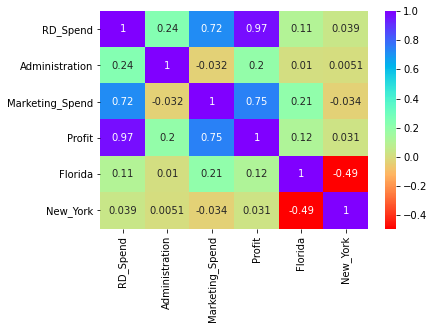

In [13]:
sns.heatmap(df1.corr(),annot=True,cmap=plt.cm.rainbow_r)

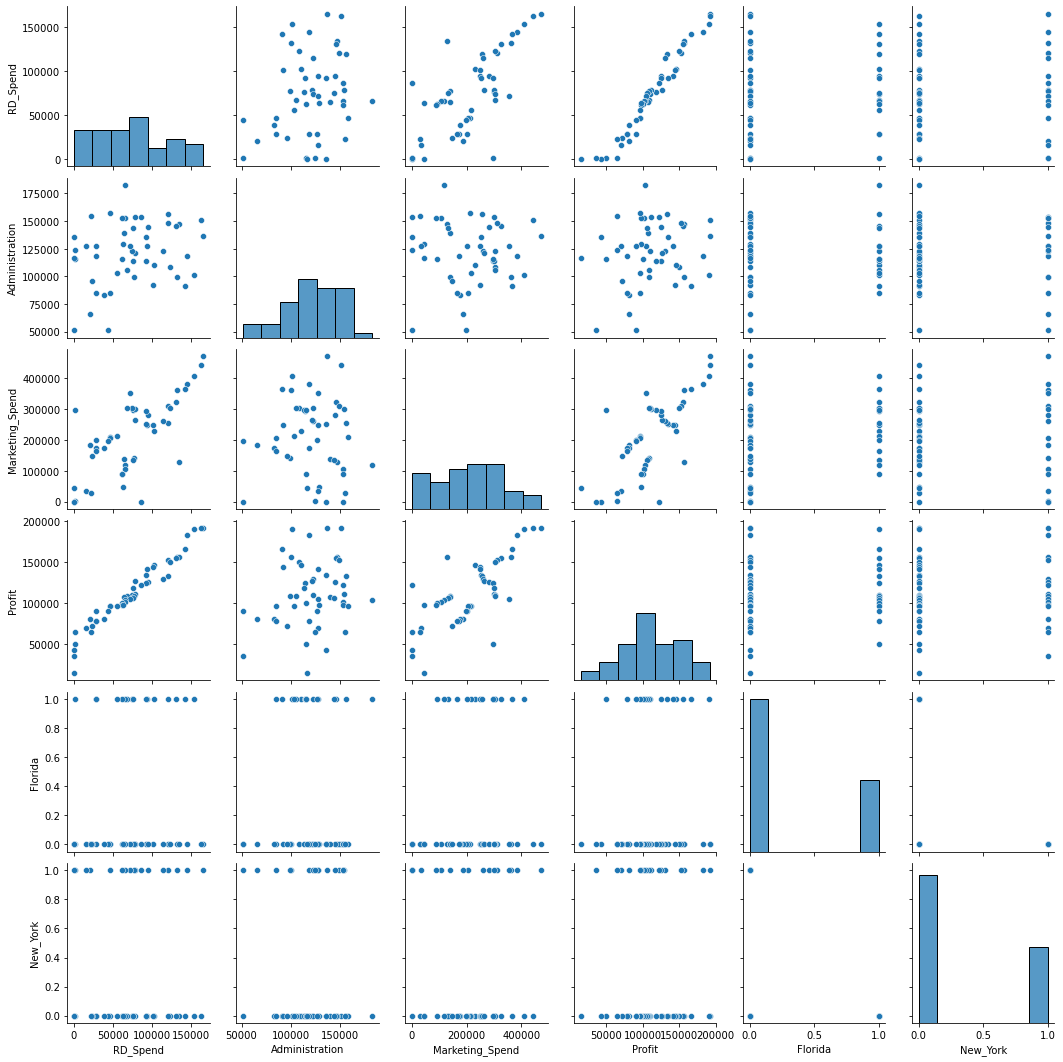

In [14]:
sns.pairplot(df1)

In [15]:
df1.columns

Index(['RD_Spend', 'Administration', 'Marketing_Spend', 'Profit', 'Florida',
       'New_York'],
      dtype='object')

In [16]:
model=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+Florida+New_York',data=df1).fit()

In [17]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           1.34e-27
Time:                        12:38:07   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.013e+04   6884.820     

In [18]:
print(model.params)

Intercept          50125.343832
RD_Spend               0.806023
Administration        -0.027004
Marketing_Spend        0.026980
Florida              198.788793
New_York             -41.887019
dtype: float64


In [19]:
print(model.rsquared,'\t',model.rsquared_adj)

0.9507524843355148 	 0.945156175737278


In [20]:
print(model.pvalues,'\n',model.tvalues)

Intercept          4.444178e-09
RD_Spend           2.578772e-21
Administration     6.077373e-01
Marketing_Spend    1.226769e-01
Florida            9.532429e-01
New_York           9.897941e-01
dtype: float64 
 Intercept           7.280560
RD_Spend           17.368580
Administration     -0.517012
Marketing_Spend     1.573889
Florida             0.058970
New_York           -0.012864
dtype: float64


# VIF

In [21]:
vif=pd.DataFrame()

In [22]:
vif['vif_values']=[variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]

In [23]:
vif['vif_columns']=df1.columns

In [24]:
vif

,vif_values,vif_columns
0,30.827865,RD_Spend
1,13.634560,Administration
2,10.206116,Marketing_Spend
3,81.792669,Profit
4,2.026738,Florida
5,1.979352,New_York


# RD_Spend and Administration are having high vif values

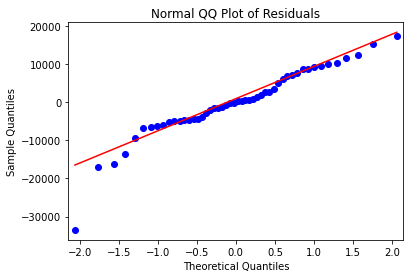

In [25]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal QQ Plot of Residuals")
plt.show()

In [26]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [27]:
def Standard_values(x):
    z=(x-x.mean())/x.std()
    return z

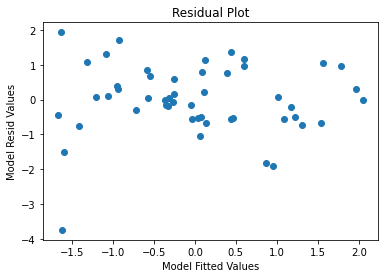

In [28]:
plt.scatter(Standard_values(model.fittedvalues),Standard_values(model.resid))
plt.xlabel("Model Fitted Values")
plt.ylabel("Model Resid Values")
plt.title("Residual Plot")
plt.show()

In [29]:
df1.columns

Index(['RD_Spend', 'Administration', 'Marketing_Spend', 'Profit', 'Florida',
       'New_York'],
      dtype='object')

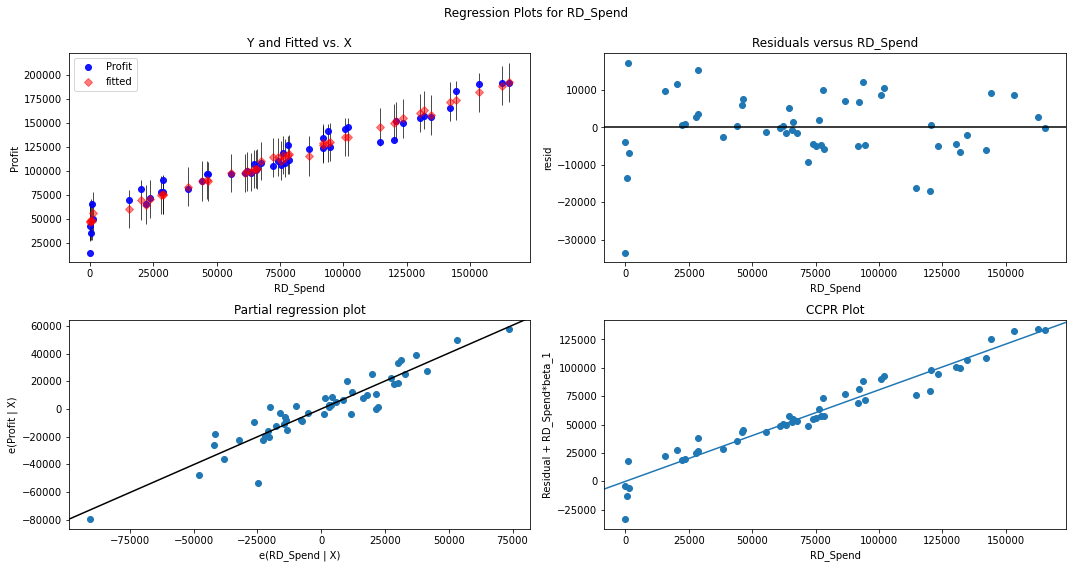

In [30]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'RD_Spend',fig)
plt.show()

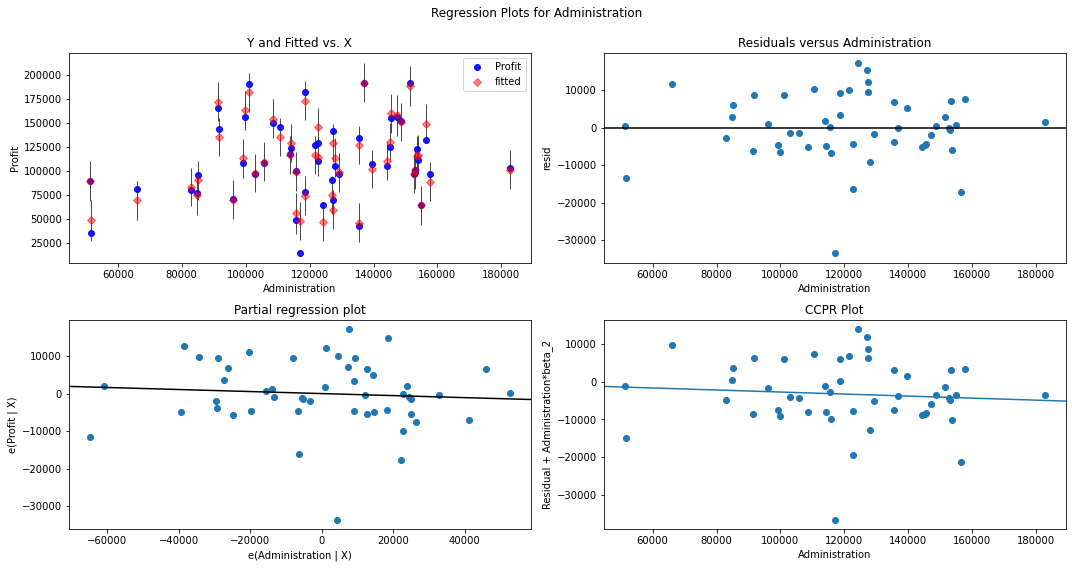

In [31]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Administration',fig)
plt.show()

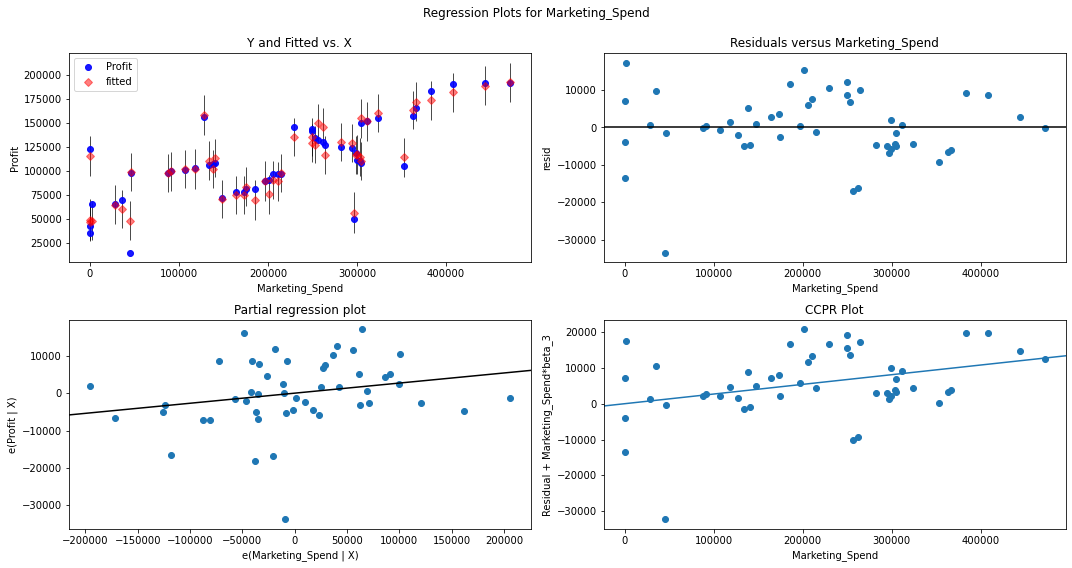

In [32]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Marketing_Spend',fig)
plt.show()

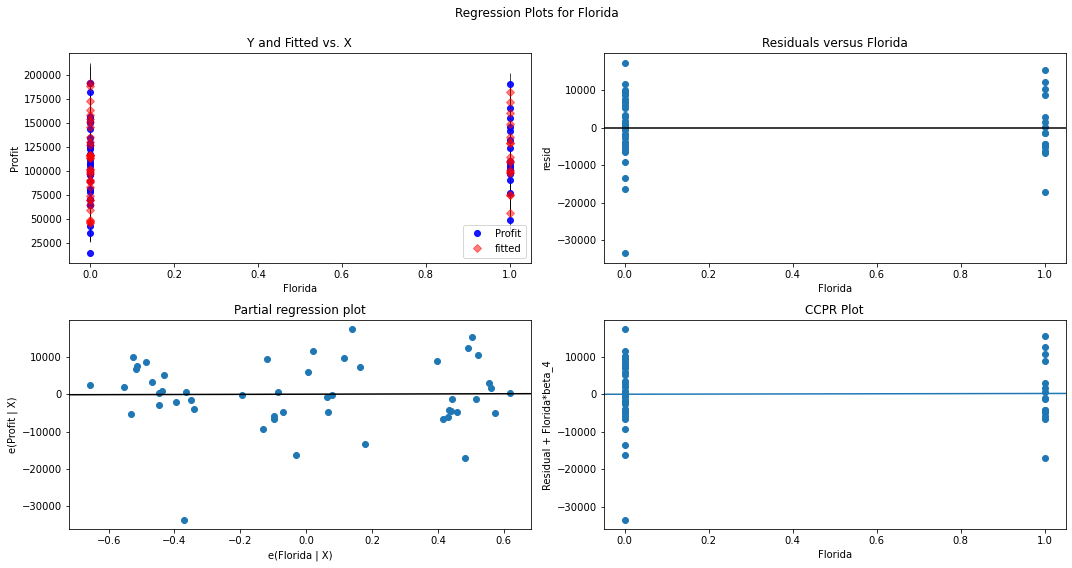

In [33]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'Florida',fig)
plt.show()

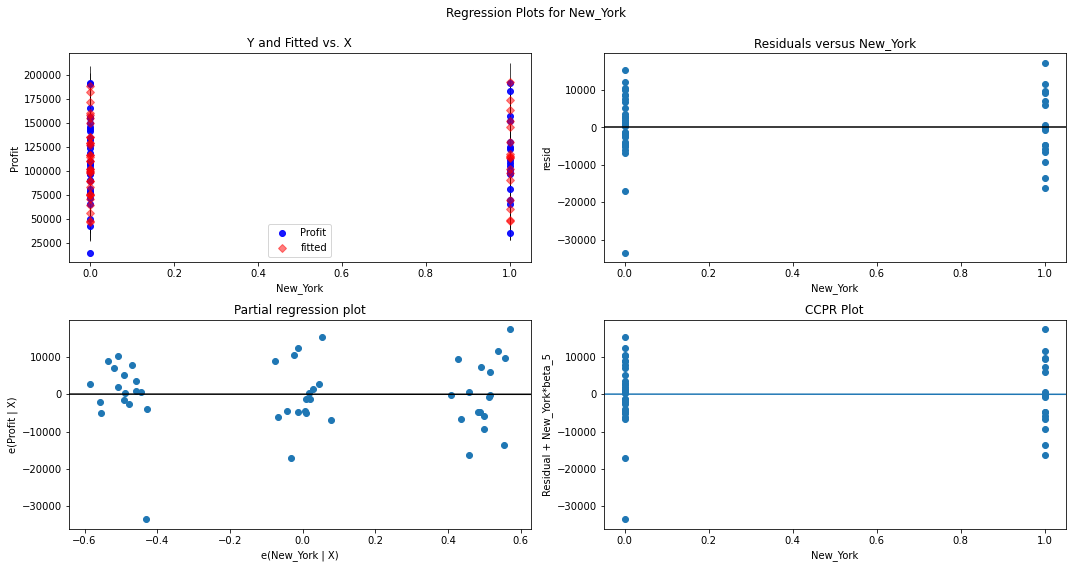

In [34]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'New_York',fig)
plt.show()

# Cooks Distance

In [35]:
model_influence=model.get_influence()

In [36]:
(c,_)=model_influence.cooks_distance

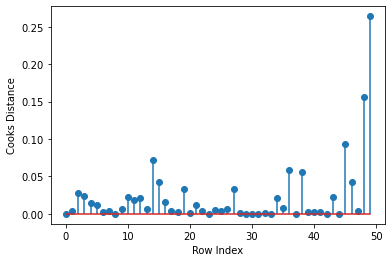

In [37]:
plt.stem(np.arange(len(df1)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [38]:
(np.argmax(c),np.max(c))

(49, 0.2639594358718259)

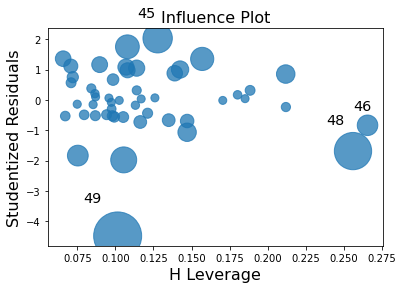

In [39]:
influence_plot(model)
plt.show()

In [40]:
k=df1.shape[1]
n=df1.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.42000000000000004

In [41]:
df1[df1.index.isin([49])]

,RD_Spend,Administration,Marketing_Spend,Profit,Florida,New_York
49,0.0,116983.8,45173.06,14681.4,0,0


In [42]:
df1.head()

,RD_Spend,Administration,Marketing_Spend,Profit,Florida,New_York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [43]:
df2=df1.drop(df1.index[[49]],axis=0).reset_index()

In [44]:
df2

,index,RD_Spend,Administration,Marketing_Spend,Profit,Florida,New_York
0,0,165349.20,136897.80,471784.10,192261.83,0,1
1,1,162597.70,151377.59,443898.53,191792.06,0,0
2,2,153441.51,101145.55,407934.54,191050.39,1,0
3,3,144372.41,118671.85,383199.62,182901.99,0,1
4,4,142107.34,91391.77,366168.42,166187.94,1,0
5,5,131876.90,99814.71,362861.36,156991.12,0,1
6,6,134615.46,147198.87,127716.82,156122.51,0,0
7,7,130298.13,145530.06,323876.68,155752.60,1,0
8,8,120542.52,148718.95,311613.29,152211.77,0,1
9,9,123334.88,108679.17,304981.62,149759.96,0,0


In [45]:
df2=df2.drop(['index'],axis=1)
df2

,RD_Spend,Administration,Marketing_Spend,Profit,Florida,New_York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0
5,131876.90,99814.71,362861.36,156991.12,0,1
6,134615.46,147198.87,127716.82,156122.51,0,0
7,130298.13,145530.06,323876.68,155752.60,1,0
8,120542.52,148718.95,311613.29,152211.77,0,1
9,123334.88,108679.17,304981.62,149759.96,0,0


In [46]:
model1=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+Florida+New_York',data=df2).fit()

In [47]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     216.6
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           2.51e-29
Time:                        12:38:13   Log-Likelihood:                -505.97
No. Observations:                  49   AIC:                             1024.
Df Residuals:                      43   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.338e+04   5794.239      9.212      0.000    4.17e+04    6.51e+04
RD_Spend            0.7836      0.039     20.056      0.000       0.705       0.862
Administration     -0.0220      0.044     -0.505      0.616      -0.110       0.066
Marketing_Spend     0.0258      0.014      1.804      0.078      -0.003       0.055
Florida         -1564.2242   2842.017     -0.550      0.585   -7295.698    4167.249
New_York        -1954.0177   2751.932     -0.710      0.482   -7503.818    3595.783
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.207
Skew:                           0.061   Prob(JB):                        0.902
Kurtosis:                       2.705   Cond. No.                     1.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
print(model1.rsquared,model1.rsquared_adj,model1.aic)

0.9618082858227786 0.9573673888254273 1023.9380387909305


In [49]:
model_influence1=model1.get_influence()

In [50]:
(c,_)=model_influence1.cooks_distance

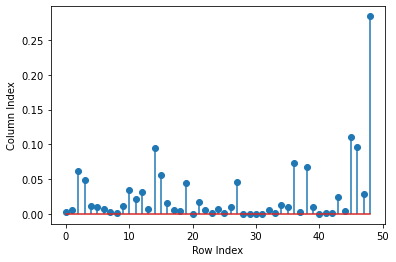

In [51]:
plt.stem(np.arange(len(df2)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Column Index')
plt.show()

In [52]:
(np.argmax(c),np.max(c))

(48, 0.28411620500495344)

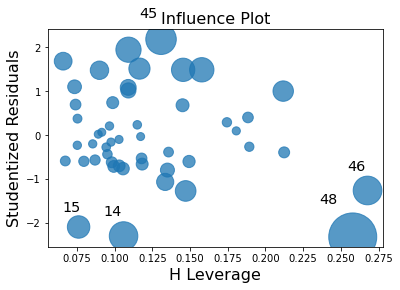

In [53]:
influence_plot(model1)
plt.show()

In [54]:
df3=df2.drop([46,48,45,14,15],axis=0,inplace=True)

In [55]:
df3=df2.reset_index()

In [56]:
df3

,index,RD_Spend,Administration,Marketing_Spend,Profit,Florida,New_York
0,0,165349.20,136897.80,471784.10,192261.83,0,1
1,1,162597.70,151377.59,443898.53,191792.06,0,0
2,2,153441.51,101145.55,407934.54,191050.39,1,0
3,3,144372.41,118671.85,383199.62,182901.99,0,1
4,4,142107.34,91391.77,366168.42,166187.94,1,0
5,5,131876.90,99814.71,362861.36,156991.12,0,1
6,6,134615.46,147198.87,127716.82,156122.51,0,0
7,7,130298.13,145530.06,323876.68,155752.60,1,0
8,8,120542.52,148718.95,311613.29,152211.77,0,1
9,9,123334.88,108679.17,304981.62,149759.96,0,0


In [57]:
df4=df3.drop(['index'],axis=1)
df4

,RD_Spend,Administration,Marketing_Spend,Profit,Florida,New_York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0
5,131876.90,99814.71,362861.36,156991.12,0,1
6,134615.46,147198.87,127716.82,156122.51,0,0
7,130298.13,145530.06,323876.68,155752.60,1,0
8,120542.52,148718.95,311613.29,152211.77,0,1
9,123334.88,108679.17,304981.62,149759.96,0,0


In [58]:
df4.columns

Index(['RD_Spend', 'Administration', 'Marketing_Spend', 'Profit', 'Florida',
       'New_York'],
      dtype='object')

In [59]:
model2=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+Florida+New_York',data=df4).fit()

In [60]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     265.7
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           1.81e-28
Time:                        12:38:14   Log-Likelihood:                -444.86
No. Observations:                  44   AIC:                             901.7
Df Residuals:                      38   BIC:                             912.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.549e+04   5338.293     

In [61]:
model_influence2=model2.get_influence()

In [62]:
(c,_)=model_influence2.cooks_distance

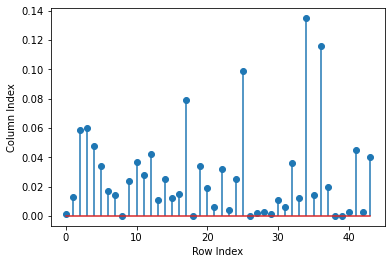

In [63]:
plt.stem(np.arange(len(df4)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Column Index')
plt.show()

In [64]:
(np.argmax(c),np.max(c))

(34, 0.13540841313890425)

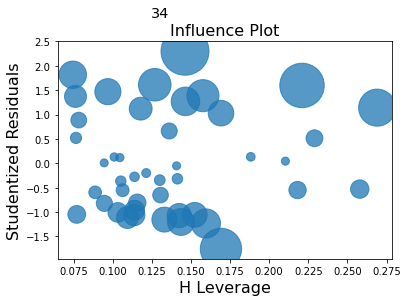

In [65]:
influence_plot(model2)
plt.show()

In [66]:
df5=df4.drop(df3.index[[34]],axis=0).reset_index()

In [67]:
df5

,index,RD_Spend,Administration,Marketing_Spend,Profit,Florida,New_York
0,0,165349.20,136897.80,471784.10,192261.83,0,1
1,1,162597.70,151377.59,443898.53,191792.06,0,0
2,2,153441.51,101145.55,407934.54,191050.39,1,0
3,3,144372.41,118671.85,383199.62,182901.99,0,1
4,4,142107.34,91391.77,366168.42,166187.94,1,0
5,5,131876.90,99814.71,362861.36,156991.12,0,1
6,6,134615.46,147198.87,127716.82,156122.51,0,0
7,7,130298.13,145530.06,323876.68,155752.60,1,0
8,8,120542.52,148718.95,311613.29,152211.77,0,1
9,9,123334.88,108679.17,304981.62,149759.96,0,0


In [68]:
df6=df5.drop(['index'],axis=1)
df6

,RD_Spend,Administration,Marketing_Spend,Profit,Florida,New_York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0
5,131876.90,99814.71,362861.36,156991.12,0,1
6,134615.46,147198.87,127716.82,156122.51,0,0
7,130298.13,145530.06,323876.68,155752.60,1,0
8,120542.52,148718.95,311613.29,152211.77,0,1
9,123334.88,108679.17,304981.62,149759.96,0,0


In [69]:
df1.columns

Index(['RD_Spend', 'Administration', 'Marketing_Spend', 'Profit', 'Florida',
       'New_York'],
      dtype='object')

In [70]:
model3=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+Florida+New_York',data=df6).fit()

In [71]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     292.7
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           1.13e-28
Time:                        12:38:14   Log-Likelihood:                -432.38
No. Observations:                  43   AIC:                             876.8
Df Residuals:                      37   BIC:                             887.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.644e+04   5077.565     

In [72]:
model_influence3=model3.get_influence()

(c,_)=model_influence3.cooks_distance

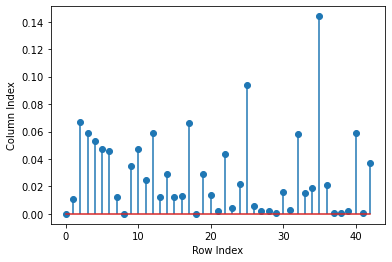

In [73]:
plt.stem(np.arange(len(df6)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Column Index')
plt.show()

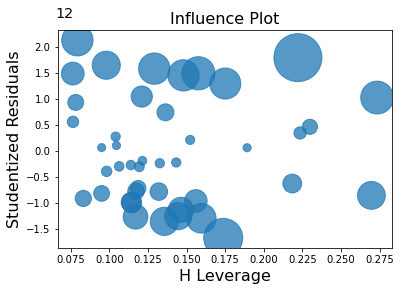

In [74]:
influence_plot(model3)
plt.show()

In [75]:
np.argmax(c),np.max(c)

(35, 0.1441868578269768)

In [76]:
df7=df6.drop(df6.index[[12,35]],axis=0).reset_index()

In [77]:
df7

,index,RD_Spend,Administration,Marketing_Spend,Profit,Florida,New_York
0,0,165349.20,136897.80,471784.10,192261.83,0,1
1,1,162597.70,151377.59,443898.53,191792.06,0,0
2,2,153441.51,101145.55,407934.54,191050.39,1,0
3,3,144372.41,118671.85,383199.62,182901.99,0,1
4,4,142107.34,91391.77,366168.42,166187.94,1,0
5,5,131876.90,99814.71,362861.36,156991.12,0,1
6,6,134615.46,147198.87,127716.82,156122.51,0,0
7,7,130298.13,145530.06,323876.68,155752.60,1,0
8,8,120542.52,148718.95,311613.29,152211.77,0,1
9,9,123334.88,108679.17,304981.62,149759.96,0,0


In [78]:
df7=df7.drop(['index'],axis=1)
df7

,RD_Spend,Administration,Marketing_Spend,Profit,Florida,New_York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0
5,131876.90,99814.71,362861.36,156991.12,0,1
6,134615.46,147198.87,127716.82,156122.51,0,0
7,130298.13,145530.06,323876.68,155752.60,1,0
8,120542.52,148718.95,311613.29,152211.77,0,1
9,123334.88,108679.17,304981.62,149759.96,0,0


In [79]:
df1.columns

Index(['RD_Spend', 'Administration', 'Marketing_Spend', 'Profit', 'Florida',
       'New_York'],
      dtype='object')

In [80]:
model4=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+Florida+New_York',data=df7).fit()

In [81]:
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     331.1
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           2.01e-28
Time:                        12:38:15   Log-Likelihood:                -408.94
No. Observations:                  41   AIC:                             829.9
Df Residuals:                      35   BIC:                             840.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.407e+04   4945.949     

In [82]:
model_influence4=model4.get_influence()

(c,_)=model_influence4.cooks_distance

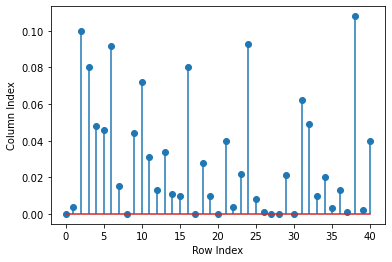

In [83]:
plt.stem(np.arange(len(df7)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Column Index')
plt.show()

## From figure we know [2,3,6,10,16,21,24,31,38,40] are having high cooks distance

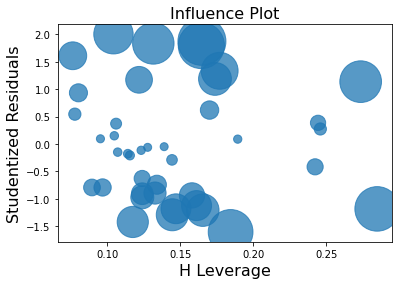

In [84]:
influence_plot(model4)
plt.show()

In [85]:
(np.argmax(c),np.max(c))

(38, 0.10768733316190843)

In [86]:
df8=df7.drop(df7.index[[2,3,6,10,16,21,24,31,38,40]],axis=0).reset_index()

In [87]:
df8

,index,RD_Spend,Administration,Marketing_Spend,Profit,Florida,New_York
0,0,165349.20,136897.80,471784.10,192261.83,0,1
1,1,162597.70,151377.59,443898.53,191792.06,0,0
2,4,142107.34,91391.77,366168.42,166187.94,1,0
3,5,131876.90,99814.71,362861.36,156991.12,0,1
4,7,130298.13,145530.06,323876.68,155752.60,1,0
5,8,120542.52,148718.95,311613.29,152211.77,0,1
6,9,123334.88,108679.17,304981.62,149759.96,0,0
7,11,100671.96,91790.61,249744.55,144259.40,0,0
8,12,91992.39,135495.07,252664.93,134307.35,0,0
9,13,78013.11,121597.55,264346.06,126992.93,0,0


In [88]:
df8=df8.drop(['index'],axis=1)
df8

,RD_Spend,Administration,Marketing_Spend,Profit,Florida,New_York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,142107.34,91391.77,366168.42,166187.94,1,0
3,131876.90,99814.71,362861.36,156991.12,0,1
4,130298.13,145530.06,323876.68,155752.60,1,0
5,120542.52,148718.95,311613.29,152211.77,0,1
6,123334.88,108679.17,304981.62,149759.96,0,0
7,100671.96,91790.61,249744.55,144259.40,0,0
8,91992.39,135495.07,252664.93,134307.35,0,0
9,78013.11,121597.55,264346.06,126992.93,0,0


In [89]:
df1.columns

Index(['RD_Spend', 'Administration', 'Marketing_Spend', 'Profit', 'Florida',
       'New_York'],
      dtype='object')

In [90]:
model5=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+Florida+New_York',data=df8).fit()

In [91]:
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     382.4
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           9.13e-23
Time:                        12:38:16   Log-Likelihood:                -298.68
No. Observations:                  31   AIC:                             609.4
Df Residuals:                      25   BIC:                             618.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         5.24e+04   4116.281     

In [92]:
print(model.rsquared,'\t',model.rsquared_adj,)

0.9507524843355148 	 0.945156175737278 	


In [93]:
print(model5.rsquared,'\t',model5.rsquared_adj)

0.9870940954247958 	 0.9845129145097549 	
